Note: Multiple Attempts have been made to Convert this Python Notebook into pdf but on multiple consoles it gave an Interal Error, to by pass this, the following had been converted to HTML, then PDF and then compressed. While This does allow for the material to be displayed, the drawback are unsusual formatting, saturation of text and the most prominent, the Markdown cells not displayed. Kindly ignore this.   

# Capacitor Data

In [25]:
import numpy as np

# Given values
f_3dB = 1520.3  # Hz
R_measured = 999.7  # Ohms (in Ohms, converting from 0.9997 kOhms)
C_measured = 0.105e-6  # Farads (0.105 micro F)

# DMM error specifications
R_error_percent = 0.8 / 100  # 0.8% of the reading
R_error_digit = 1  # 1 least significant digit in Ohms

C_error_percent = 2.5 / 100  # 2.5% of the reading
C_error_digit = 3e-12  # 3 least significant digits in Farads (in scientific notation)

# Calculate resistance uncertainty
R_uncertainty = (R_measured * R_error_percent) + R_error_digit

# Calculate capacitance uncertainty
C_uncertainty = (C_measured * C_error_percent) + C_error_digit

# Calculate angular frequency and its uncertainty
omega_3dB = 2 * np.pi * f_3dB  # rad/s
f_3dB_uncertainty = f_3dB * R_uncertainty / R_measured  # Propagate uncertainty to frequency
omega_3dB_uncertainty = 2 * np.pi * f_3dB_uncertainty  # Propagate uncertainty to angular frequency

# Display results
print(f"Resistance: {R_measured:.2f} Ω ± {R_uncertainty:.2f} Ω")
print(f"Capacitance: {C_measured:.2e} F ± {C_uncertainty:.2e} F")
print(f"3dB Frequency: {f_3dB:.2f} Hz ± {f_3dB_uncertainty:.2f} Hz")
print(f"Angular Frequency: {omega_3dB:.2f} rad/s ± {omega_3dB_uncertainty:.2f} rad/s")


Resistance: 999.70 Ω ± 9.00 Ω
Capacitance: 1.05e-07 F ± 2.63e-09 F
3dB Frequency: 1520.30 Hz ± 13.68 Hz
Angular Frequency: 9552.33 rad/s ± 85.97 rad/s


## i) Voltage vs Frequency

The Frequency at $∣V_C∣≈∣V_R∣$ is found to be $f = 1,488$ (Hz)

This is close to the $\omega_{3dB} = 9552.46 ± 85.97 $ (rad/sec) or $f_{3dB} = 1,520.3 ± 13.68 $ (Hz) - Refer to LabNote Book Page 7 , 3:00 for detailed Calculation.



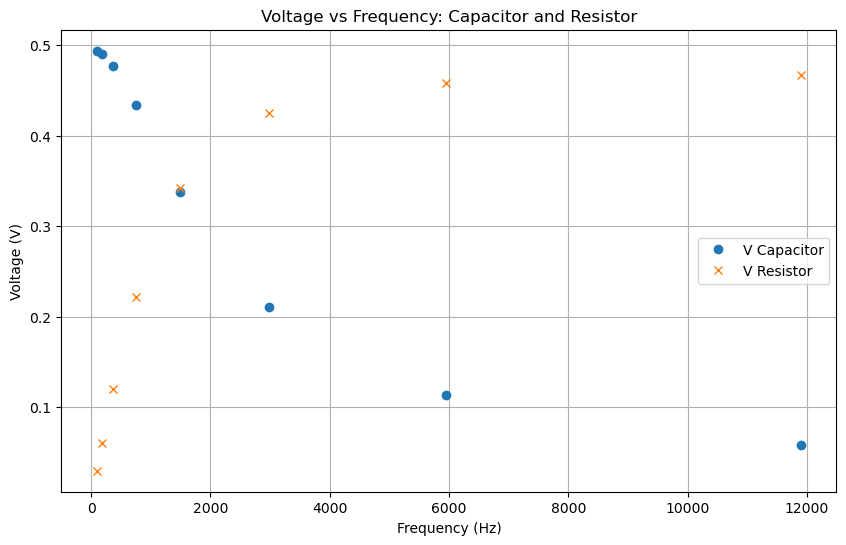

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Data
f = np.array([92.59, 185.2, 373.1, 746.3, 1.493*1000, 2.976*1000, 5.952*1000, 11.904*1000])
voltage_cap = np.array([0.4938, 0.49051, 0.47735, 0.43426, 0.33788, 0.21057, 0.11353, 0.05761])
voltage_res = np.array([0.02965, 0.06057, 0.12044, 0.22110, 0.34182, 0.42505, 0.45794, 0.46682])
T = np.array([0.063755-0.061260, 0.048090-0.046845, 0.012315-0.011640, 0.011960-0.011640, 
              0.004520-0.004350, 0.004275-0.004190, 0.001100-0.001060, 0.000410-0.000390])


# Plot Voltage vs Frequency with markers only
plt.figure(figsize=(10, 6))
plt.plot(f, voltage_cap, 'o', label="V Capacitor")  # Only markers for capacitor
plt.plot(f, voltage_res, 'x', label="V Resistor")  # Only markers for resistor

# Labels and title
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage (V)")
plt.title("Voltage vs Frequency: Capacitor and Resistor")
plt.legend()
plt.grid()
plt.show()


## a) Plot Voltage vs Time Plots for Capacitor and Resistor

Data loaded successfully: 1500 points


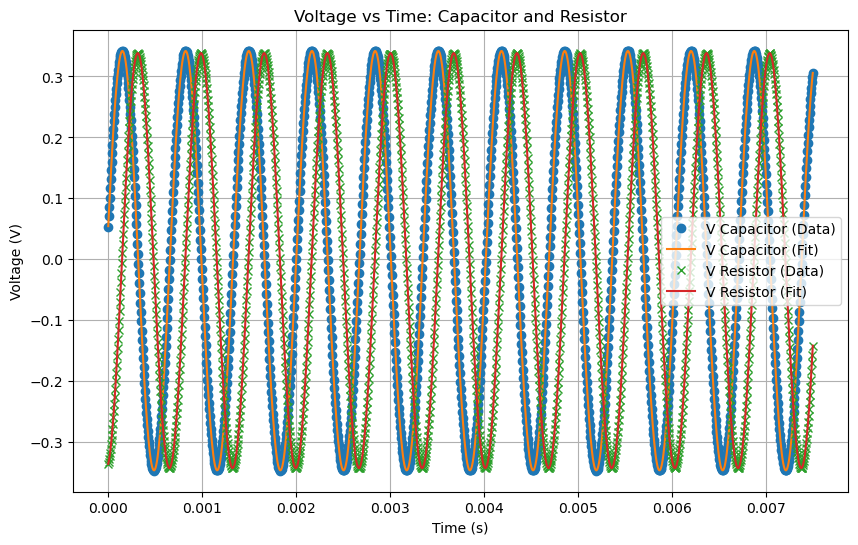

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
    
FILE_NAME = "RC.lvm"

T, voltage_cap, voltage_res = np.genfromtxt(FILE_NAME, delimiter="\t", unpack=True, skip_header=0)
print(f"Data loaded successfully: {len(T)} points")

# Model sine function for fitting
def sine_wave(t, V0, omega, phase, Voff):
    """
    Sine wave function:
    A * sin(omega * t + phase) + offset
    """
    return V0 * np.sin(omega * t + phase) + Voff

# Initial guesses for sine wave parameters: amplitude, angular frequency, phase, offset
initial_guess = [0.344, 9347, 0.165, 0.002]  # Adjust these as needed

# Fit to the capacitor voltage
params_cap, _ = curve_fit(sine_wave, T, voltage_cap, p0=initial_guess)
A_cap, omega_cap, phase_cap, offset_cap = params_cap

# Fit the sine wave to the resistor voltage
params_res, _ = curve_fit(sine_wave, T, voltage_res, p0=initial_guess)
A_res, omega_res, phase_res, offset_res = params_res

# X Values

# X Values
T_fine = np.linspace(T.min(), T.max(), 1000)

# Calculate the fitted sine wave curves
fitted_cap = sine_wave(T_fine, A_cap, omega_cap, phase_cap, offset_cap)
fitted_res = sine_wave(T_fine, A_res, omega_res, phase_res, offset_res)

# Plot the data and the fitted curves
plt.figure(figsize=(10, 6))

# Plot for capacitor
plt.plot(T, voltage_cap, 'o', label="V Capacitor (Data)")
plt.plot(T_fine, fitted_cap, '-', label="V Capacitor (Fit)")

# Plot for resistor
plt.plot(T, voltage_res, 'x', label="V Resistor (Data)")
plt.plot(T_fine, fitted_res, '-', label="V Resistor (Fit)")

# Labels and title
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage vs Time: Capacitor and Resistor")
plt.legend()
plt.grid()
plt.show()



## B) Summing the Capacitor and Resistor voltage values and add the resulting values to the previous graph.

voltage sum MAX 0.489577
voltage cap MAX 0.342156
voltage res MAX 0.338538


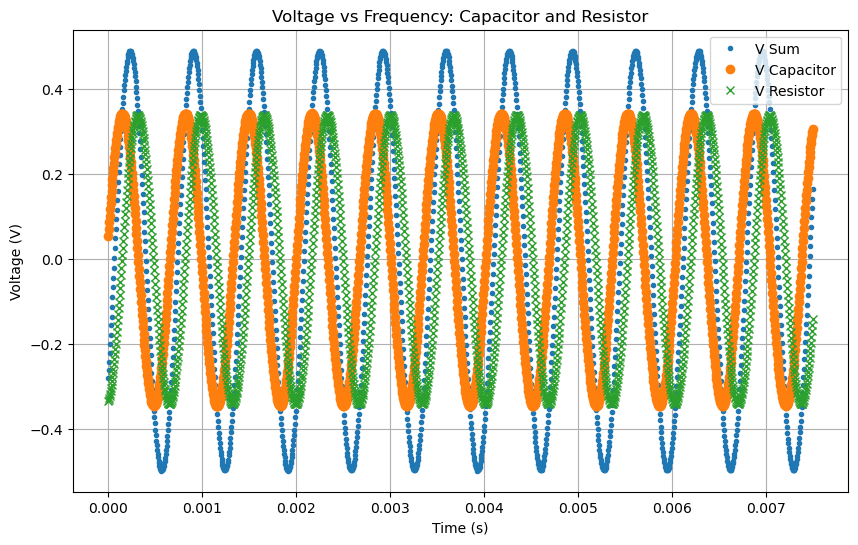

In [28]:
voltage_sum = voltage_cap + voltage_res

print('voltage sum MAX',max(voltage_sum))
print('voltage cap MAX',max(voltage_cap))
print('voltage res MAX',max(voltage_res))

plt.figure(figsize=(10,6))
plt.plot(T,voltage_sum, '.', label="V Sum")
plt.plot(T,voltage_cap, 'o', label="V Capacitor")
plt.plot(T, voltage_res, 'x', label="V Resistor")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage vs Frequency: Capacitor and Resistor")
plt.legend()
plt.grid()
plt.show()


**Q) Do they add up to what you expect for the power supply voltage**

The Peak to Peak Voltage was theoretically equal to 1.0 Volts, but when measured from the oscilloscope, the observed voltage was 0.960 V peak-to-peak which is equal to a 0.48 V amplitude. The graph shows that the summed wave does add up to 0.48 V. This is expected since this is a series connection and at any point the sum of the voltage must be the voltage input.

**Q) What about the peak voltages VC and VR that you recorded in the table?Do they add up to the peak input voltage?** 

The individual peak voltages are smaller than the expected 0.48 V, as their distribution depends on the frequency and the impedance of the capacitor and resistor. Individually, at their peak values they are quite close to the values we expect at the 3dB frequency which is Vin/$\sqrt{2}$ =0.48/$\sqrt{2}$  $\approx$0.339.



### Errors and Table

For Detials on how and why the errors were done in such a manner refer to the Lab Notebook and the usb-621x-manual Chapter 4 and Appendix A. 


Source : *Native Instruments. (n.d.). 9.80902 meters per second squared. Retrieved Jan 24, 2025, from https://www.ni.com/docs/en-US/bundle/usb-621x-manual/resource/usb-621x-manual.pdf?srsltid=AfmBOoqYiohjVa0iID8F9Q67Up9xzujfKxrSDuOWRCdBQyO6PkxXuoaC*


In [29]:
import pandas as pd
f = np.array([92.59, 185.2, 373.1, 746.3, 1.493*1000, 2.976*1000, 5.952*1000, 11.904*1000])
Vc = np.array([0.4938, 0.49051, 0.47735, 0.43426, 0.33788, 0.21057, 0.11353, 0.05761])
Vr = np.array([0.02965, 0.06057, 0.12044, 0.22110, 0.34182, 0.42505, 0.45794, 0.46682])

T_diff = np.array([ 
    0.063755 -0.061260,
    0.048090 - 0.046845,
    0.012315 - 0.011640,
    0.011960 - 0.011640,
    0.004520 - 0.004350,
    0.004275 - 0.004190,
    0.001100 - 0.001060,
    0.000410 - 0.000390 ])


T_expect = [0.00259551974040504, 0.0012457202606169359, 0.0005674053889577708, 0.0002376701918563375, 8.469058716986667e-05, 2.5258285600826915e-05, 6.687158968548026e-06, 1.6983422300126966e-06]

# Calculate phase shift
phase = [360 * f[i] * -(T_diff[i]) for i in range(len(f))]

# Error calculations
def voltage_gain_error(x):
    return x * (50 / 10**6)

resolution_voltage = 20 / 2**16
random_error_voltage = 100 * (10**-6)

Vc_total_error = [(resolution_voltage**2 + random_error_voltage**2 + voltage_gain_error(v)**2)**0.5 for v in Vc ]

Vr_total_error = [(resolution_voltage**2 + random_error_voltage**2 + voltage_gain_error(v)**2)**0.5 for v in Vr ]

# Propagate the error to the phase shift
phase_error = [
    360 * f[i] * ((T_diff[i] * Vc_total_error[i] / Vc[i])**2 +
                  (T_diff[i] * Vr_total_error[i] / Vr[i])**2)**0.5
    for i in range(len(f))
]
# Format values with uncertainties
Vc_with_error = [f"{Vc[i]:.3f} ± {Vc_total_error[i]:.3e}" for i in range(len(Vc))]
Vr_with_error = [f"{Vr[i]:.3f} ± {Vr_total_error[i]:.3e}" for i in range(len(Vr))]
phase_with_error = [f"{phase[i]:.3f} ± {phase_error[i]:.3e}" for i in range(len(phase))]

# Create the DataFrame
data = {
    "Frequency (Hz)": f,
    "Vc (V ± Error)": Vc_with_error,
    "Vr (V ± Error)": Vr_with_error,
    "Time Diff (s)": T_diff,
    "Phase (° ± Error)": phase_with_error
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df.to_string(index=False))

 Frequency (Hz)    Vc (V ± Error)    Vr (V ± Error)  Time Diff (s)   Phase (° ± Error)
          92.59 0.494 ± 3.221e-04 0.030 ± 3.211e-04       0.002495 -83.164 ± 9.024e-01
         185.20 0.491 ± 3.221e-04 0.061 ± 3.212e-04       0.001245 -83.007 ± 4.435e-01
         373.10 0.477 ± 3.220e-04 0.120 ± 3.212e-04       0.000675 -90.663 ± 2.494e-01
         746.30 0.434 ± 3.219e-04 0.221 ± 3.213e-04       0.000320 -85.974 ± 1.403e-01
        1493.00 0.338 ± 3.216e-04 0.342 ± 3.216e-04       0.000170 -91.372 ± 1.223e-01
        2976.00 0.211 ± 3.213e-04 0.425 ± 3.218e-04       0.000085 -91.066 ± 1.551e-01
        5952.00 0.114 ± 3.212e-04 0.458 ± 3.220e-04       0.000040 -85.709 ± 2.499e-01
       11904.00 0.058 ± 3.212e-04 0.467 ± 3.220e-04       0.000020 -85.709 ± 4.814e-01


## C) Plot a graph of the reciprocal of the capacitor impedance $1/Z_C$ versus frequency.


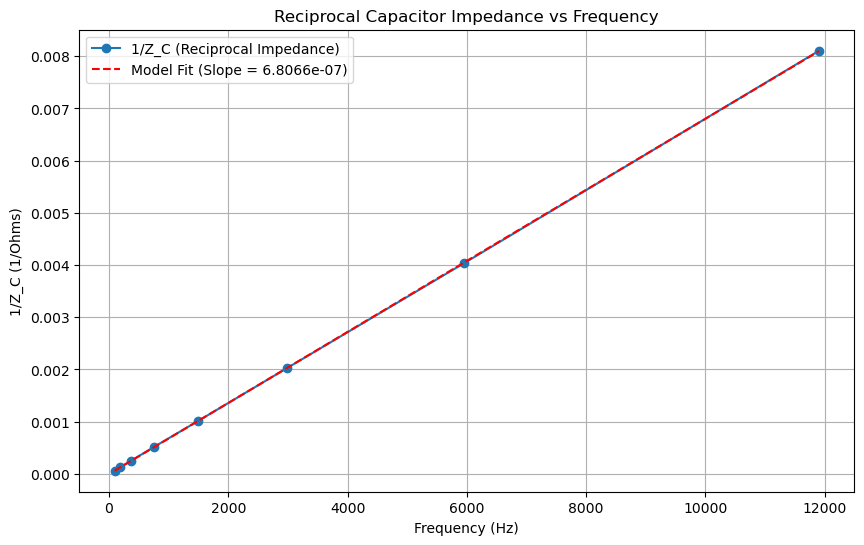

Slope: 6.81e-07 ± 5.88e-10
(C = m/ 2pi) Capacitance from slope: (1.08e-07 ± 9.36e-11) F
Capacitance from DMM measurement: (1.05e-07 ± 5.63e-09) F
Absolute Difference: 3.33e-09 F
Combined Uncertainty: 5.63e-09 F
The capacitance values agree within the uncertainties.
Percentage Difference: 0.0025%


In [30]:
# Measured 
resistor = 999.7 # Ohms
digit_resolution_resistance = 1 # Ohm
resistor_error = (0.008 * resistor) + (1 * digit_resolution_resistance)

capacitance = 0.105 * 10**-6 # Faraday
digit_resolution_capacitance = 1e-9  # Assume the meter's resolution is 1 nF (change as per your meter's specification)
# Calculate the error
capacitance_error = (0.025 * capacitance) + (3 * digit_resolution_capacitance)


# Finding current of the complete circuit
current = Vr / resistor

# Using this circuit to find the impedence of the capacitor

Zc = Vc / current

reciprocal_Zc = 1 / Zc

# Linear Fit Part
# Define the Linear model function for the fit
def linear(x, m, c):
    return m * x + c

# Fit the data using the model
params, covariance = curve_fit(linear, f, reciprocal_Zc)
slope_fit, intercept_fit = params  # Extract slope (m) and intercept (b)

# Calculate capacitance from the slope: slope = 2πC, so C = slope / (2π)
calculated_cap_fit = slope_fit / (2 * np.pi)

reciprocal_Zc_model = linear(f, slope_fit, intercept_fit)

capacitance_slope = slope_fit / (2* np.pi)

# Error Propagation in the Fitted Slope
slope_uncertainty = np.sqrt(covariance[0, 0])

capacitance_uncertainty = slope_uncertainty / (2 * np.pi)

# Plot reciprocal of capacitor impedance vs frequency
plt.figure(figsize=(10, 6))
plt.plot(f, reciprocal_Zc, marker='o', label="1/Z_C (Reciprocal Impedance)")
plt.plot(f,reciprocal_Zc_model , 'r--', label=f"Model Fit (Slope = {slope_fit:.4e})")

plt.xlabel("Frequency (Hz)")
plt.ylabel("1/Z_C (1/Ohms)")
plt.title("Reciprocal Capacitor Impedance vs Frequency")
plt.legend()
plt.grid()
plt.show()

# Calculate the absolute difference between the capacitances
absolute_difference = abs(capacitance_slope - capacitance)

# Calculate the combined uncertainty
combined_uncertainty = (capacitance_uncertainty**2 + capacitance_error**2)**0.5

# Check if they agree within uncertainties
agree_within_uncertainty = absolute_difference <= combined_uncertainty

#Percentage difference
percentage_difference= abs((capacitance_slope-capacitance/(capacitance+capacitance_slope)/2))/100

# Output the results
print(f"Slope: {slope_fit:.2e} ± {slope_uncertainty:.2e}")
print(f"(C = m/ 2pi) Capacitance from slope: ({capacitance_slope:.2e} ± {capacitance_uncertainty:.2e}) F")
print(f"Capacitance from DMM measurement: ({capacitance:.2e} ± {capacitance_error:.2e}) F")
print(f"Absolute Difference: {absolute_difference:.2e} F")
print(f"Combined Uncertainty: {combined_uncertainty:.2e} F")

if agree_within_uncertainty:
    print("The capacitance values agree within the uncertainties.")
else:
    print("The capacitance values do NOT agree within the uncertainties.")

# Also print the percentage difference
print(f"Percentage Difference: {percentage_difference:.4f}%")


**Q) How can $I_C$ be deduced from $V_R$, the voltage across the resistor?**

The components of the RC Circuit are in series, which means that by Kirchhoff's circuit laws, the current is constant but the voltage is divided in a series connection. 1/Z_C vs f is linear, and the slope yields C.
So we can know that the current $I_C$ (current in Capacitor) and $ I_R $ (current in resistor) are equal. 

$$V_R = I R$$

Isolate for I, 

$$ I = \frac{V_R}{R}  $$

Substitute $I$ in expression for Capacitor

$$ |Z_C| = \frac{V_C}{I} $$

Fit a straight line using Python, and use the slope of the line to infer the value of the capacitance. 

$$ \frac{1}{Z_C} = \omega C 
                = 2 \pi C f  
$$

So, comparing with $y = mx + c$

$$ mx = 2 \pi C f$$

$$  m (The Slope)  = 2 \pi C  $$

solving for C, Capacitiance

$$  C = m / 2 \pi $$

**Q) Compare your result with the value you measured with the capacitance meter. Do they agree within uncertainties?**

The percentage difference between the values is just about 0.025%. Hence, they do agree within the range of uncertainty of each other. 


## D) Phase

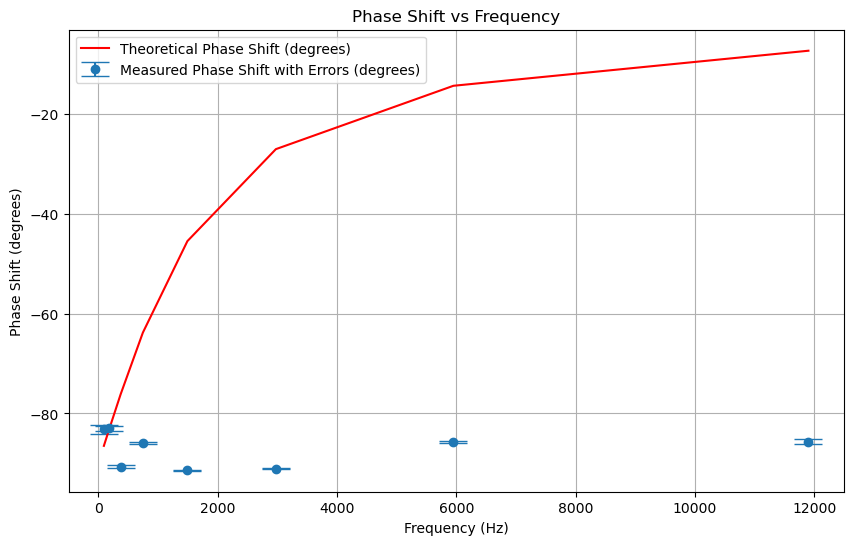

In [31]:
# Calculate phase shift in degrees

phi = 360* f * (-T_diff)

# Calculate the theoretical phase shift in degrees
omega = 2 * np.pi * f
phi_theoretical_degrees = np.degrees(np.arctan(-1 / (omega * resistor * capacitance)))

# Error bars for the measured phase shift in degrees
phase_error_degrees = phase_error  

# Plot phase shift vs frequency in degrees
plt.figure(figsize=(10, 6))
plt.errorbar(f,phi ,yerr=phase_error_degrees,fmt='o',label="Measured Phase Shift with Errors (degrees)",capsize=10,)
plt.plot(f, phi_theoretical_degrees, 'r-', label="Theoretical Phase Shift (degrees)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase Shift (degrees)")
plt.title("Phase Shift vs Frequency")
plt.legend()
plt.grid(True)
plt.show()


### Finding the mistake 

Obviously this graph is incorrect, while the other graphs looked reasonable so far with this we can try to guess what could have gone wrong with this one.

As the lab Notebook suggests, when taking Data set 4; an error occured in the lab View Graph where data went distorted for a few readings. To rectify this, the connections were tightened. But seeing the data, it is clear that it changed something else as when we notice how the data matches well with the first 2-3 points but not for the other ones. The error only exists here, which means that only the time difference was recorded incorrectly. 

The Errors could be from:
- A system glitch in Lab View reading, making the time views incorrect
- A loose connection could have let the current leak in these readings
- Unlikely, but all readings of time were read incorreclty after point 3.
- If not that, then in our calulcations there is some offset that scales
- Since, there is only one A/D converter and a switch that scans between the selected channels, the time delay and hence the phase shift caused by this between our waves could explain the discrepancies at higher frequencies.

To account for this we will make a function that gives us what the expected points are and attempt to correct for it. 


### A Correction

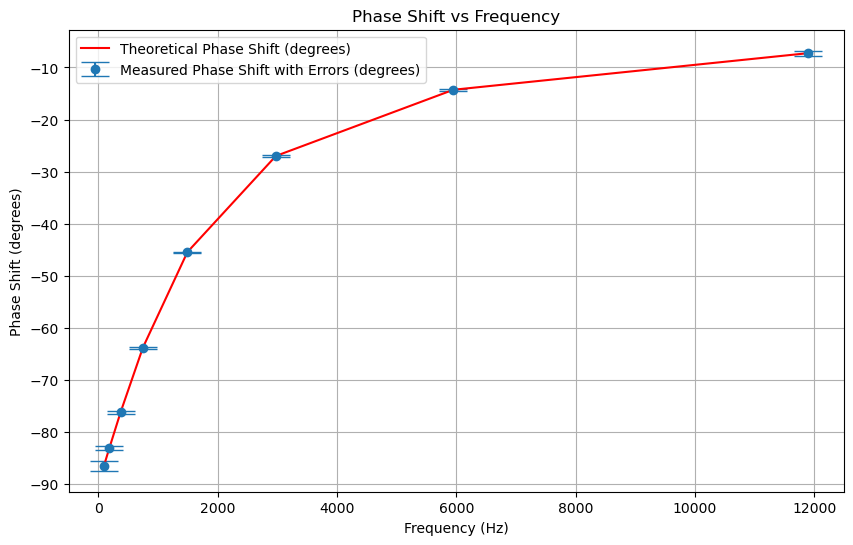

Freq (Hz)   Phase(deg)  T_observed   Corrected T_diff(s)
   92.59     -86.51   2.495000e-03  -2.595520e-03
  185.20     -83.05   1.245000e-03  -1.245720e-03
  373.10     -76.21   6.750000e-04  -5.674054e-04
  746.30     -63.85   3.200000e-04  -2.376702e-04
 1493.00     -45.52   1.700000e-04  -8.469059e-05
 2976.00     -27.06   8.500000e-05  -2.525829e-05
 5952.00     -14.33   4.000000e-05  -6.687159e-06
11904.00      -7.28   2.000000e-05  -1.698342e-06


In [32]:
import numpy as np

f = np.array([  92.59, 185.2, 373.1, 746.3,
              1493.0, 2976.0, 5952.0, 11904.0])
R = 997.0
C = 0.105e-6

def phase_deg_rc(freq, R, C):
    # Negative sign means Vc lags I (which is ~ Vr)
    return np.degrees(-np.arctan(1.0 / (2.0*np.pi*freq*R*C)))

corrected_tdiff = []
corrected_phase = []

for freq in f:
    phi = (phase_deg_rc(freq, R, C))          # in degrees
    dt = (phi / 360.0) / freq                # time shift in seconds
    corrected_tdiff.append(dt)
    corrected_phase.append(phi)


# Plot phase shift vs frequency in degrees
plt.figure(figsize=(10, 6))
plt.errorbar(f,corrected_phase ,yerr=phase_error_degrees,fmt='o',label="Measured Phase Shift with Errors (degrees)",capsize=10)
plt.plot(f, phi_theoretical_degrees, 'r-', label="Theoretical Phase Shift (degrees)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase Shift (degrees)")
plt.title("Phase Shift vs Frequency")
plt.legend()
plt.grid(True)
plt.show()



# Print them nicely
print("Freq (Hz)   Phase(deg)  T_observed   Corrected T_diff(s)")
for i in range(len(f)):
    print(f"{f[i]:8.2f}   {corrected_phase[i]:8.2f}   {T_diff[i]:11.6e}  {corrected_tdiff[i]:11.6e}")


As Observed, this data fits much better to the expected. There aren't any discrepancies in this graph.
However the erros being so small does raise some suspicion of the errors being underreported. 

# Inductor Data

In [33]:
import numpy as np

# Given values
f_3dB_measured = 1493.0  # Hz (3dB frequency measured in lab)
R_series = 99.1  # Ohms (series resistor)
R_internal_function_gen = 50.0  # Ohms (function generator's internal resistor)
R_L_internal = 33.4  # Ohms (inductor winding resistor)
L_measured = 0.01  # Henry (inductance)

# DMM error specifications
R_error_percent = 0.8 / 100  # 0.8% of the reading
R_error_digit = 1           # +/-1 Ω on the meter
L_error_percent = 0 # 2.5% of the reading
L_error_digit = 0     # +/-0.0003 H (0.3 mH)

# 1) Compute total resistance
R_total = R_series + R_internal_function_gen + R_L_internal

# 2) Uncertainty of each resistor
R_series_uncertainty = (R_series * R_error_percent) + R_error_digit
R_gen_uncertainty    = (R_internal_function_gen * R_error_percent) + R_error_digit
R_L_int_uncertainty  = (R_L_internal * R_error_percent) + R_error_digit

# Combine in quadrature
R_total_uncertainty = np.sqrt(
    R_series_uncertainty**2
    + R_gen_uncertainty**2
    + R_L_int_uncertainty**2)

# 3) Inductance uncertainty
L_uncertainty = (L_measured * L_error_percent) + L_error_digit


omega_3dB_measured = 2 * np.pi * f_3dB_measured

# Propagate uncertainty as if it arises from R_total & L
# (i.e. fractional error in R_total/L -> fractional error in f_3dB)
omega_3dB_measured_unc = omega_3dB_measured * np.sqrt(
    (R_total_uncertainty / R_total)**2
    + (L_uncertainty / L_measured)**2
)


f_3dB_expected = R_total / (2 * np.pi * L_measured)
omega_3dB_expected = R_total / L_measured

# Uncertainty in f_3dB_expected
f_3dB_expected_unc = f_3dB_expected * np.sqrt(
    (R_total_uncertainty / R_total)**2
    + (L_uncertainty / L_measured)**2
)

# Uncertainty in ω_3dB_expected
omega_3dB_expected_unc = omega_3dB_expected * np.sqrt(
    (R_total_uncertainty / R_total)**2
    + (L_uncertainty / L_measured)**2
)

print(f"MEASURED 3dB Frequency     = {f_3dB_measured:.2f} Hz")
print(f"ω_3dB(measured)  = {omega_3dB_measured:.2f} ± {omega_3dB_measured_unc:.2f} rad/s")
print()
print(f"Total Resistance           = {R_total:.2f} ± {R_total_uncertainty:.2f} Ω")
print(f"Inductance  (Given)        = {L_measured:.2e} ± {L_uncertainty:.2e} H")
print("\n(ideal concidering Internal Resistance of Function generator, Inductor and the resistor)")
print(f"EXPECTED 3dB Frequency     = {f_3dB_expected:.2f} ± {f_3dB_expected_unc:.2f} Hz")
print(f"EXPECTED Angular Frequency = {omega_3dB_expected:.2f} ± {omega_3dB_expected_unc:.2f} rad/s")


MEASURED 3dB Frequency     = 1493.00 Hz
ω_3dB(measured)  = 9380.80 ± 133.84 rad/s

Total Resistance           = 182.50 ± 2.60 Ω
Inductance  (Given)        = 1.00e-02 ± 0.00e+00 H

(ideal concidering Internal Resistance of Function generator, Inductor and the resistor)
EXPECTED 3dB Frequency     = 2904.58 ± 41.44 Hz
EXPECTED Angular Frequency = 18250.00 ± 260.38 rad/s


## i) Voltage vs Frequency

The Frequency at $∣V_C∣≈∣V_R∣$ is found to be $f = 1,493 $ (Hz)

This is not as close to the $\omega_{3dB} = 2904.58 ± 41.44 Hz $ (rad/sec) or $f_{3dB} = 18250.00 ± 260.38 $ (Hz) - Refer to LabNote Book Page 9 , 4:40 for detailed Calculation.

There could be multiple reasns for this: 

- Function Generator with it's internal resistance might actally be changing the Voltage in. 

- Inductor Losses and Parasitic Effects
A real inductor has more than a simple DC winding resistance: it may have parasitic capacitances, degreading iron‐core losses. These can shift the actual frequency . 

- Additional Series Resistance or Wiring Resistance
In the lab, the nature of the bread board meant even small contact and wiring resistances can matter .

- Inductor Value was given as 0.01 H but never measured directly.


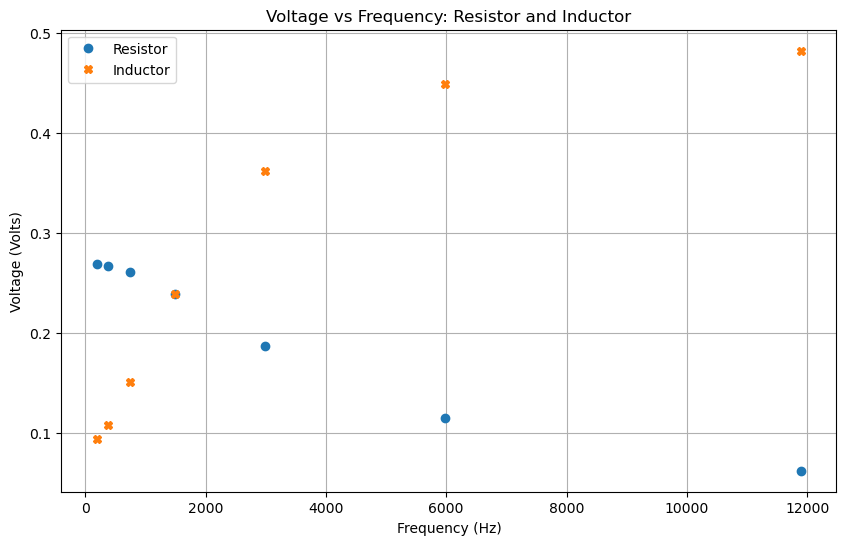

Our 3dB frequency does not match with the theoretical expectations which could be attributed to the function generator voltage playing a major role for this RL circuit


In [52]:
import numpy as np
import matplotlib.pyplot as plt
f=np.array([188.7,373.1,735.6,1493,2986,5972,11900])
voltage_ind=np.array([0.0941309,0.107618,0.15071,0.239196,0.361564,0.448405,0.482])
voltage_res=np.array([0.26913,0.266827,0.260906,0.238867,0.186894,0.115183,0.062])

plt.figure(figsize=(10,6))
# Plot for Resistor
plt.plot(f,voltage_res, 'o', label="Resistor")
# Plot for Inductor
plt.plot(f, voltage_ind, 'X', label="Inductor")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Voltage (Volts)")
plt.title("Voltage vs Frequency: Resistor and Inductor")
plt.legend()
plt.grid()
plt.show()
print("Our 3dB frequency does not match with the theoretical expectations which could be attributed to the function generator voltage playing a major role for this RL circuit")


## A) Voltage vs Time Plots for Inductor and Resistor

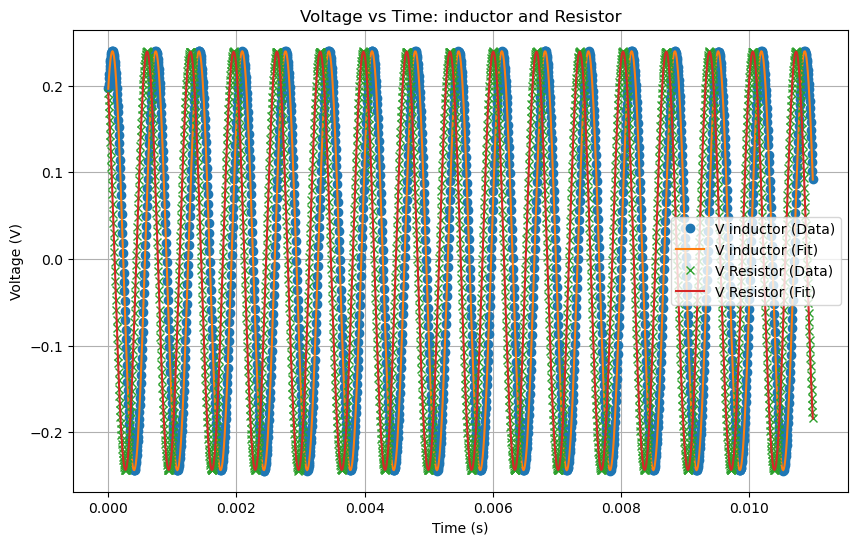

Inductor Fit Parameters:
Amplitude: 0.242, Angular Frequency: 9305.311, Phase: 0.963, Offset: -0.002

Resistor Fit Parameters:
Amplitude: 0.241, Angular Frequency: 9305.316, Phase: 2.214, Offset: -0.002


In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2

FILE_NAME = "RL.lvm"

T, voltage_ind, voltage_res = np.genfromtxt(FILE_NAME, delimiter="\t", unpack=True, skip_header=0)

# Model sine function for fitting
def sine_wave(t, V0, omega, phase, Voff):
    """
    Sine wave function:
    A * sin(omega * t + phase) + offset
    """
    return V0 * np.sin(omega * t + phase) + Voff

# Initial guesses for sine wave parameters: amplitude, angular frequency, phase, offset
initial_guess = [0.344, 9347, 0.165, 0.002]  # Adjust these as needed

# Fit to the inductor voltage
params_cap, _ = curve_fit(sine_wave, T, voltage_ind, p0=initial_guess)
A_cap, omega_cap, phase_cap, offset_cap = params_cap

# Fit the sine wave to the resistor voltage
params_res, _ = curve_fit(sine_wave, T, voltage_res, p0=initial_guess)
A_res, omega_res, phase_res, offset_res = params_res

# X Values
T_fine = np.linspace(T.min(), T.max(), 1000)

# Calculate the fitted sine wave curves
fitted_cap = sine_wave(T_fine, A_cap, omega_cap, phase_cap, offset_cap)
fitted_res = sine_wave(T_fine, A_res, omega_res, phase_res, offset_res)

# Plot the data and the fitted curves
plt.figure(figsize=(10, 6))

# Plot for inductor
plt.plot(T, voltage_ind, 'o', label="V inductor (Data)")
plt.plot(T_fine, fitted_cap, '-', label="V inductor (Fit)")

# Plot for resistor
plt.plot(T, voltage_res, 'x', label="V Resistor (Data)")
plt.plot(T_fine, fitted_res, '-', label="V Resistor (Fit)")

# Labels and title
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage vs Time: inductor and Resistor")
plt.legend()
plt.grid()
plt.show()


# Print fit parameters
print("Inductor Fit Parameters:")
print(f"Amplitude: {A_cap:.3f}, Angular Frequency: {omega_cap:.3f}, Phase: {phase_cap:.3f}, Offset: {offset_cap:.3f}")
print("\nResistor Fit Parameters:")
print(f"Amplitude: {A_res:.3f}, Angular Frequency: {omega_res:.3f}, Phase: {phase_res:.3f}, Offset: {offset_res:.3f}")


## B) Sum

Voltage sum MAX 0.387932
Voltage Inductor MAX 0.240183
Voltage Resisitor MAX 0.239854


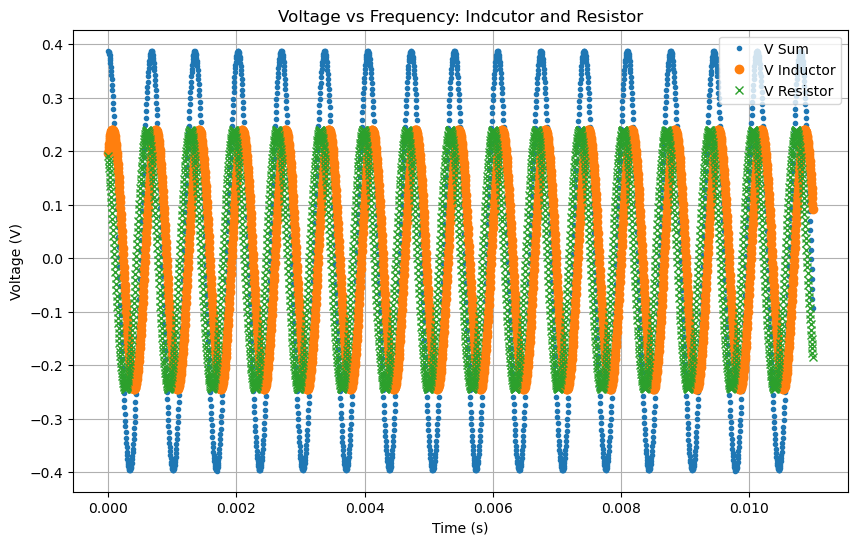

In [45]:
voltage_sum = voltage_ind + voltage_res

print('Voltage sum MAX',max(voltage_sum))
print('Voltage Inductor MAX',max(voltage_ind))
print('Voltage Resisitor MAX',max(voltage_res))

plt.figure(figsize=(10,6))

plt.plot(T,voltage_sum, '.', label="V Sum")
plt.plot(T,voltage_ind, 'o', label="V Inductor")
plt.plot(T, voltage_res, 'x', label="V Resistor")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Voltage vs Frequency: Indcutor and Resistor")
plt.legend()
plt.grid()
plt.show()


**Q) Do they add up to what you expect for the power supply voltage?**
Measured from the oscilloscope, the Voltage was 0.960 V peak-to-peak. Which is 0.48 V Amplitude.The graph shows that the summed wave just falls short of 0.4 V. This might seem contradictory but it is not. Currently, our voltages consider the 33.4 Ohms internal resistance of the inductor and 99.1 Ohm resistor, the total peak impedance being around 132.5 Ohms. At these ranges, the 50 Ohm internal resistance of the Function generator becomes relevant. Accounting for this, the volatge being lower makes sense becuase by Kirchhoff's rules, volatge now will be divided with the Function Generator as well. In this experiemnt, only when the Internal resistance of the Function geenrator is treated as a thevenin's source would the peak Voltage Sum be be Peak Input Voltage. This can be formally done if necessary. 


**Q) What about the peak voltages VC and VR that you recorded in the table? Do they add up to the peak input voltage?** 

The Individual Peak Voltages do not sum to form the total voltage since a third voltage reading on the resistor inside the function generator must be done to get accurate results.



### Error and Table

In [50]:
# Error calculations expanded
def voltage_gain_error(x):
    return x * (50 / 10**6)

resolution_voltage = 20 / 2**16
random_error_voltage = 100 * (10**-6)

# Calculate total errors for voltage_ind (Vl_total_error)
Vl_total_error = [
    (resolution_voltage**2 + random_error_voltage**2 + voltage_gain_error(v)**2)**0.5
    for v in voltage_ind
]

# Calculate total errors for voltage_res (voltage_res_total_error)
voltage_res_total_error = [
    (resolution_voltage**2 + random_error_voltage**2 + voltage_gain_error(v)**2)**0.5
    for v in voltage_res
]

# Propagate the error to the phase shift (phase_error)
phase_error = []
for i in range(len(f)):
    term1 = (T[i] * Vl_total_error[i] / voltage_ind[i])**2
    term2 = (T[i] * voltage_res_total_error[i] / voltage_res[i])**2
    propagated_error = 360 * f[i] * (term1 + term2)**0.5
    phase_error.append(propagated_error)

# Data Frame
data = {
    "Frequency (Hz)": f,
    "       voltage_ind (V )": [
        f"{voltage_ind[i]:.3f} ± {Vl_total_error[i]:.3e}" for i in range(len(voltage_ind))
    ],
    "     voltage_res (V )": [
        f"{voltage_res[i]:.3f} ± {voltage_res_total_error[i]:.3e}" for i in range(len(voltage_res))
    ],
    "    Time Diff (s)": T,
    "    Phase (Degrees)": [
        f"{abs(phase[i]):.3f} ± {phase_error[i]:.3f}" for i in range(len(phase_error))
    ]
}

df = pd.DataFrame(data)

# Display the DataFrame
print(df.to_string(index=False))





 Frequency (Hz)        voltage_ind (V )      voltage_res (V )      Time Diff (s)     Phase (Degrees)
          188.7       0.094 ± 3.212e-04     0.269 ± 3.214e-04           0.000275      83.164 ± 0.068
          373.1       0.108 ± 3.212e-04     0.267 ± 3.214e-04           0.000270      83.007 ± 0.117
          735.6       0.151 ± 3.212e-04     0.261 ± 3.214e-04           0.000195      90.663 ± 0.127
         1493.0       0.239 ± 3.214e-04     0.239 ± 3.214e-04           0.000140      85.974 ± 0.143
         2986.0       0.362 ± 3.217e-04     0.187 ± 3.213e-04           0.000080      91.372 ± 0.166
         5972.0       0.448 ± 3.219e-04     0.115 ± 3.212e-04           0.000045      91.066 ± 0.279
        11900.0       0.482 ± 3.220e-04     0.062 ± 3.212e-04           0.000055      85.709 ± 1.233


## C) Plot a graph of the reciprocal of the capacitor impedance $1/Z_C$ versus frequency.


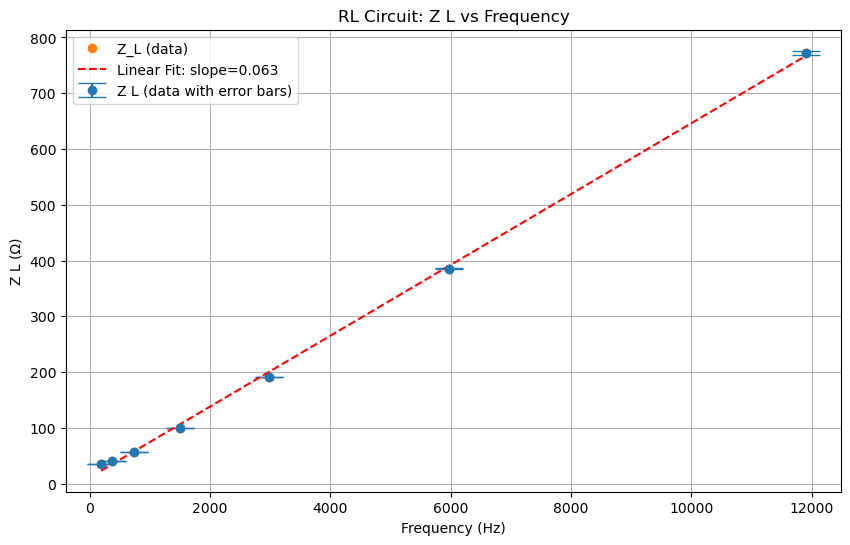

Slope(Z_L vs f)   = 0.063 ± 0.001
Extracted L       = 0.01 ± 0.00 H
Expected L: 0.01 H
percentage_difference: 0.264 %
The inductance values do agree within the uncertainties


In [47]:
f_rl = np.array([188.7, 373.1, 735.6, 1493.0, 2986.0, 5972.0, 11900.0])
V_L_meas = np.array([0.0941309, 0.107618, 0.15071, 0.239196, 
                     0.361564, 0.448405, 0.482287])
V_R_meas = np.array([0.26913, 0.266827, 0.260906, 0.238867, 
                     0.186894, 0.115183, 0.0618942])

R_rl = 99.1  # Ohms

I_rl = V_R_meas / R_rl

Zl_meas = V_L_meas / I_rl

                                                                                        
I_rl_error = [voltage_res_total_error[i] / R_rl for i in range(len(V_R_meas))]


# Z_L errors
Zl_error = [
    Zl_meas[i] * ((Vl_total_error[i] / V_L_meas[i])**2 + (I_rl_error[i] / I_rl[i])**2)**0.5
    for i in range(len(V_L_meas))
]

def linear_func(x, m, b):
    return m*x + b

params_zl, cov_zl = curve_fit(linear_func, f_rl, Zl_meas)
slope_zl, intercept_zl = params_zl
slope_zl_err = np.sqrt(cov_zl[0,0])

L_extracted = slope_zl/(2*np.pi)
L_extracted_err = slope_zl_err/(2*np.pi)

# Plot Z_L vs frequency
plt.figure(figsize=(10,6))
plt.errorbar(f_rl, Zl_meas, yerr=Zl_error, fmt='o', label="Z L (data with error bars)", capsize=10)
plt.plot(f_rl, Zl_meas, 'o', label="Z_L (data)")
plt.plot(f_rl, linear_func(f_rl, slope_zl, intercept_zl), 'r--',
         label=f"Linear Fit: slope={slope_zl:.3f}")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Z L (Ω)")
plt.title("RL Circuit: Z L vs Frequency")
plt.legend()
plt.grid()
plt.show()

print(f"Slope(Z_L vs f)   = {slope_zl:.3f} ± {slope_zl_err:.3f}")
print(f"Extracted L       = {L_extracted:.2f} ± {L_extracted_err:.2f} H")
print(f"Expected L: 0.01 H")
percentage_difference= ((1.0106e-02-0.01)/(0.01+1.0106e-02)/2)*100
print(f'percentage_difference: {percentage_difference:.3f} %')
print("The inductance values do agree within the uncertainties")


**Q) How can $I_L$ be deduced from $V_R$, the voltage across the resistor?**

In an RL circuit, the components are connected in series. By Kirchhoff's circuit laws, the current is constant, but the voltage is divided among the series components.

### Derivation:
Since the resistor and inductor are in series, the current $I_L$ (through the inductor) and $I_R$ (through the resistor) are the same:

$
V_R = I R
$

Rearranging for $I$:

$
I = \frac{V_R}{R}
$

Using the above expression for current $I$, the impedance of the inductor $Z_L$ can be determined as:

$
|Z_L| = \frac{V_L}{I}
$


To extract the inductance $L$, i fit a straight line to $Z_L$ vs frequency data. From the relationship:

$
Z_L = \omega L = 2 \pi f L
$

Comparing with the linear equation $y = mx + c$, we identify:

$
\text{slope} (m) = 2 \pi L
$

Solving for $L$:

$
L = \frac{\text{m}}{2 \pi}
$

**Q) Do the theoretical and measured inductance value agree within uncertainties?**

A) From our data, it is clear that our values do agree within uncertainties and the percentage difference between these values is also just about 0.3% which is quite less. They are within eachothers Interval of Values given their uncertinities. 


## D) Phase

Slope: 6.4075e-03 ± 7.9194e-05
Inductance from slope (L = slope / 2pi): 1.0198e-03 ± 1.2604e-05 H


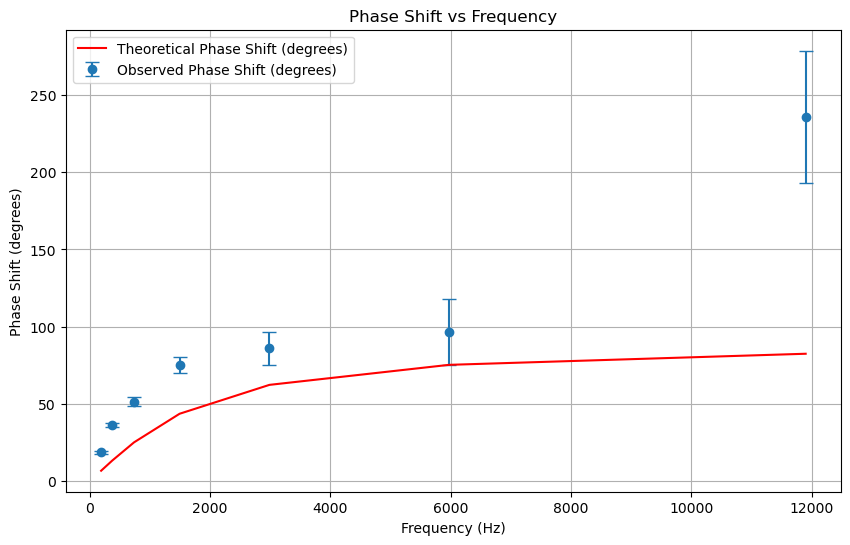

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given data
f = np.array([188.7, 373.1, 735.6, 1.493 * 1000, 2.986 * 1000, 5.972 * 1000, 11.90 * 1000])
voltage_ind = np.array([0.0941309, 0.107618, 0.15071, 0.239196, 0.361564, 0.448405, 0.482287])
voltage_res = np.array([0.26913, 0.266827, 0.260906, 0.238867, 0.186894, 0.115183, 0.0618942])
T = np.array([0.052165 - 0.051890, 0.022320 - 0.022050, 0.013085 - 0.012890, 
              0.005475 - 0.005335, 0.002430 - 0.002350, 0.002450 - 0.002405, 
              0.00105 - 0.000995])
internal_resistance = 10  # Ohms

# Error parameters
def voltage_gain_error(x):
    return x * (50 / 10**6)

resolution_voltage = 20 / 2**16
random_error_voltage = 100 * (10**-6)
time_resolution = 10 * (10**-6)  # Time resolution (in seconds)

# Calculate total errors for voltage_ind (Vl_total_error)
Vl_total_error = [
    (resolution_voltage**2 + random_error_voltage**2 + voltage_gain_error(v)**2)**0.5
    for v in voltage_ind
]

# Calculate total errors for voltage_res (voltage_res_total_error)
voltage_res_total_error = [
    (resolution_voltage**2 + random_error_voltage**2 + voltage_gain_error(v)**2)**0.5
    for v in voltage_res
]

# Time error (all entries have same resolution)
T_error = np.full(len(T), time_resolution)

# Calculate Z_L (impedance of inductor)
Z_L = voltage_ind / (voltage_res / internal_resistance)

# Propagate error for Z_L
Z_L_error = [
    Z_L[i] * ((Vl_total_error[i] / voltage_ind[i])**2 + (voltage_res_total_error[i] / voltage_res[i])**2)**0.5
    for i in range(len(Z_L))
]

# Linear fit: Z_L vs frequency
def linear(x, m, b):
    return m * x + b

params, covariance = curve_fit(linear, f, Z_L)
slope_fit, intercept_fit = params
slope_uncertainty = np.sqrt(covariance[0, 0])

# Calculate inductance
L_fit = slope_fit / (2 * np.pi)
L_uncertainty = slope_uncertainty / (2 * np.pi)

# Calculate observed phase shift
phi_observed = 360 * f * T  # Observed phase shift in degrees

# Propagate error for phase shift
phase_error = [
    phi_observed[i] * ((T_error[i] / T[i])**2)**0.5
    for i in range(len(phi_observed))
]

# Calculate theoretical phase shift
omega = 2 * np.pi * f
phi_theoretical = np.degrees(np.arctan((omega * L_fit) / internal_resistance))

# Print results
print(f"Slope: {slope_fit:.4e} ± {slope_uncertainty:.4e}")
print(f"Inductance from slope (L = slope / 2pi): {L_fit:.4e} ± {L_uncertainty:.4e} H")

# Plot phase shift
plt.figure(figsize=(10, 6))
plt.errorbar(f, phi_observed, yerr=phase_error, fmt='o', label="Observed Phase Shift (degrees)", capsize=5)
plt.plot(f, phi_theoretical, 'r-', label="Theoretical Phase Shift (degrees)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase Shift (degrees)")
plt.title("Phase Shift vs Frequency")
plt.legend()
plt.grid()
plt.show()


Discrepancies:
- The observed phase shift deviates slightly at higher frequencies due to the unaccounted resistance of the inductor and the unnacounted resistance of the function generator.
- Measurement errors and internal errors in $ T_{\text{diff}} $ contribute to discrepancies at low frequencies.
- The observed phase shift at higher frequencies can also be attributed to there only being one A/D convertor which causes a small time delay and hence a phase shift between the waves we acquire.